<a id="intro"></a>
# Анализ оттока клиентов банка

**Описание проекта**

Заказчики — менеджмент банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. 

Цель исследования — проанализировать клиентов банка и выделить сегменты клиентов, которые склонны уходить из банка.

**Содержание**:
1. [Исследовательский анализ](#analyze_data)
2. [Анализ сегментов с высокой отточностью](#analyze_segment)
3. [Проверка статистических гипотез](#hypothesis)
4. [Презентация](https://disk.yandex.ru/i/4N8lRLVmxNufjw)

 👉 **[Итоги исследования](#research_results)**

 
**Описание данных**

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента,
- `сhurn` — признак оттока.



## Общая информация о данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import os
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import sys
import scipy.stats as st
try:
    import phik
except ImportError:
    !"{sys.executable}" -m pip install phik
    import phik

In [2]:
# проверка на возможность выполнения Markdown
if 'ipykernel' in sys.modules:
    flag_md = 1
else:
    flag_md = 0

In [3]:
# чтение файла с данными и сохранение в датафрейм
dir1 = '/datasets/'
dir2 = '/Users/alexslobodskoj/Data_Analyst/'
places_pth = 'bank_scrooge.csv'

# создание датафрейма с данными
if os.path.exists(dir1):
    df_bank = pd.read_csv(dir1 + places_pth)
elif os.path.exists(dir2):
    df_bank = pd.read_csv(dir2 + places_pth)
else:
    print('Something is wrong')

In [4]:
# датафрейм о клиентах банка
# вывод первых 5 строчек 
display(df_bank.head())

# вывод основной информации
df_bank.info()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


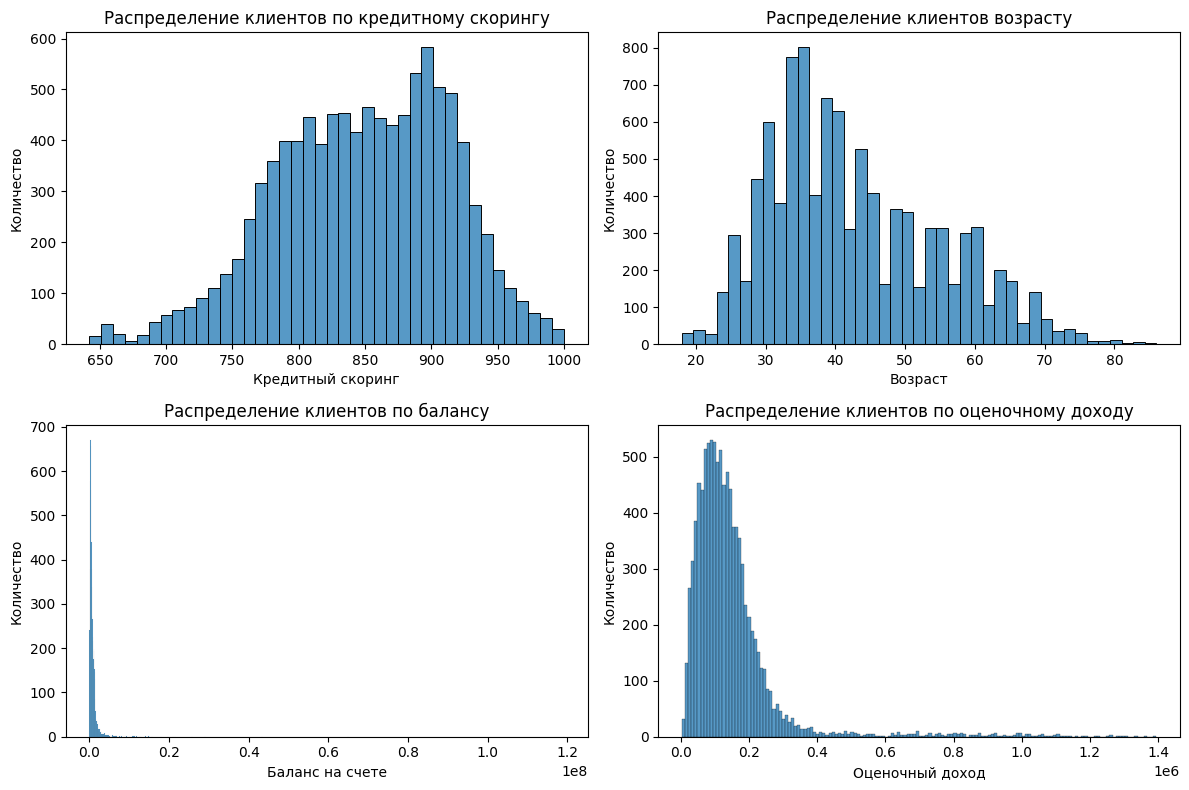

In [5]:
# распределение основных числовых характеристик
# задание размера области графиков
plt.figure(figsize=(12, 8))

# гистограмма для столбца 'score'
plt.subplot(2, 2, 1)
sns.histplot(df_bank['score'])
plt.title('Распределение клиентов по кредитному скорингу')
plt.ylabel('Количество')
plt.xlabel('Кредитный скоринг')

# гистограмма для столбца 'age'
plt.subplot(2, 2, 2)
sns.histplot(df_bank['age'])
plt.title('Распределение клиентов возрасту')
plt.ylabel('Количество')
plt.xlabel('Возраст')

# гистограмма для столбца 'balance'
plt.subplot(2, 2, 3)
sns.histplot(df_bank['balance'])
plt.title('Распределение клиентов по балансу')
plt.ylabel('Количество')
plt.xlabel('Баланс на счете')

# гистограмма для столбца 'EST_SALARY'
plt.subplot(2, 2, 4)
sns.histplot(df_bank['EST_SALARY'])
plt.title('Распределение клиентов по оценочному доходу')
plt.ylabel('Количество')
plt.xlabel('Оценочный доход')
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. В таблице данные о **10000** клиентах

2. Необходимо переименовать столбцы (нижний регистр)

3. Необходимо изменить тип столбцов:

    - `age` и `score` на целочисленный,
    - `credit_card`, `last_activity`, `churn` на булевый

5. Таблицу необходимо проверить на наличие дубликатов

6. В столбцах `balance`, `EST_SALARY` есть выбросы

7. В таблице есть пропущенные значения - нужно определить возможность их заполнения/исключения из анализа

## Предобработка данных

### Переименование столбцов

In [6]:
df_bank.columns = [x.lower() for x in df_bank.columns.values]

### Изменение типа столбцов

Изменим тип столбцов `age` и `score` на целочисленный.

In [7]:
# запись названий столбцов в список
columns_to_convert = ['age', 'score']

# изменение типа данных в столбцах
for col in columns_to_convert:
    df_bank[col] = \
    (
        df_bank[col]
        .astype(pd.Int64Dtype())
    )

Изменим тип столбцов `credit_card`, `last_activity`, `churn` на булевый.

In [8]:
# запись названий столбцов в список
columns_to_convert = ['credit_card', 'last_activity', 'churn']

# изменение типа данных в столбцах
for col in columns_to_convert:
    df_bank[col] = \
    (
        df_bank[col]
        .astype(bool)
    )

### Проверка наличия дубликатов

Проверим наличие явных дубликатов

In [9]:
# вывод названий таблиц и количество явных дубликатов в них
message = (
    f'Удалим **{df_bank.duplicated().sum()}**'
    f' явных дубликатов строк'
) if df_bank.duplicated().sum() > 0 else f'Нет явных дубликатов в таблице'

if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))

Нет явных дубликатов в таблице

Проверим наличие неявных дубликатов в столбцах `city` и `gender`

In [10]:
# запись названий столбцов в список
columns_to_convert = ['city', 'gender']

# # вывод значений каждого столбца
for col in columns_to_convert:
    display(df_bank[col].value_counts(sort=True, ascending=False, dropna=True))
    print()

city
Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: count, dtype: int64

gender
М    5005
Ж    4995
Name: count, dtype: int64

Неявных дубликатов в столбцах `city` и `gender` не обнаружено.

Проверим наличие дубликатов `userid` в одном городе.

In [11]:
# поиск дублей
df_agg = \
(
    df_bank
    .groupby(['userid', 'city'])
    .size()
    .reset_index(name='count')
    .query('count > 1')
)

# проверка на дубли
if (df_agg['count'] > 1).any():
    
    message = (
        f'Есть **{len(df_agg)}** дубликатов `userid` в одном городе.\n\n'
        f'Оставим первое вхождение дубликата для дальнейшего анализа.'
    )
    
else:
    message = (
        f'Нет дубликатов `userid` в одном городе.'
    )
    
# вывод сообщения про дубликаты 
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))

Нет дубликатов `userid` в одном городе.

### Обработка пропущенных значений

Рассчитаем процент пропущенных значений по филиалам банка.

In [12]:
# вывод информации о доле пропущенных значений
for city in df_bank['city'].sort_values(ascending=False).unique():
    city_data = df_bank.query('city == @city')
    na_series = city_data.isna().sum() > 0
    df_na = pd.DataFrame(city_data.isna().mean()[na_series], columns = [city])
    display(df_na.style.format("{:.2%}").background_gradient('coolwarm'))
    

,Ярославль
age,0.22%
balance,24.92%


,Рыбинск
age,0.45%
balance,22.00%


,Ростов
age,0.07%
balance,16.58%


Доля пропусков по филиалам примерно одинаковая, учитывая размеры городов.

Рассчитаем процент пропущенных значений по ушедшим/оставшимся клиентам.

In [13]:
# вывод информации о доле пропущенных значений
for churn in df_bank['churn'].unique():
    churn_data = df_bank.query('churn == @churn')
    na_series = churn_data.isna().sum() > 0
    df_na = pd.DataFrame(
        churn_data.isna()
        .mean()[na_series], 
        columns = ["Ушедшие" if churn == True else "Оставшиеся"])
    display(df_na.style.format("{:.2%}").background_gradient('coolwarm'))
    

,Ушедшие
age,0.05%
balance,0.71%


,Оставшиеся
age,0.31%
balance,27.90%


Пропуски не связаны с признаком отточности клиентов. 

Заполнение пропусков нулевыми или другими значениями может исказить результаты исследования. Оставим пропуски без изменения.

<div style="border:solid gray 1px; padding: 20px">

**Выводы**:
  
1. Переименовали названия столбцов в нижний регистр
   
2. Изменили тип столбцов `age` и `score` на целочисленный, столбцов `credit_card`, `last_activity`, `churn` на булевый

3. Явные и неявные дубликаты в таблицах не обнаружены

4. Обработали пропущенные значения

<a id="analyze_data"></a>
## Исследовательский анализ данных

Цель: выявить потенциальные сегменты клиентов, склоных к уходу из банка.

### Распределение клиентов по признаку оттока

Оценим числовое и графическое распределение отточности клиентов в целом по банку.

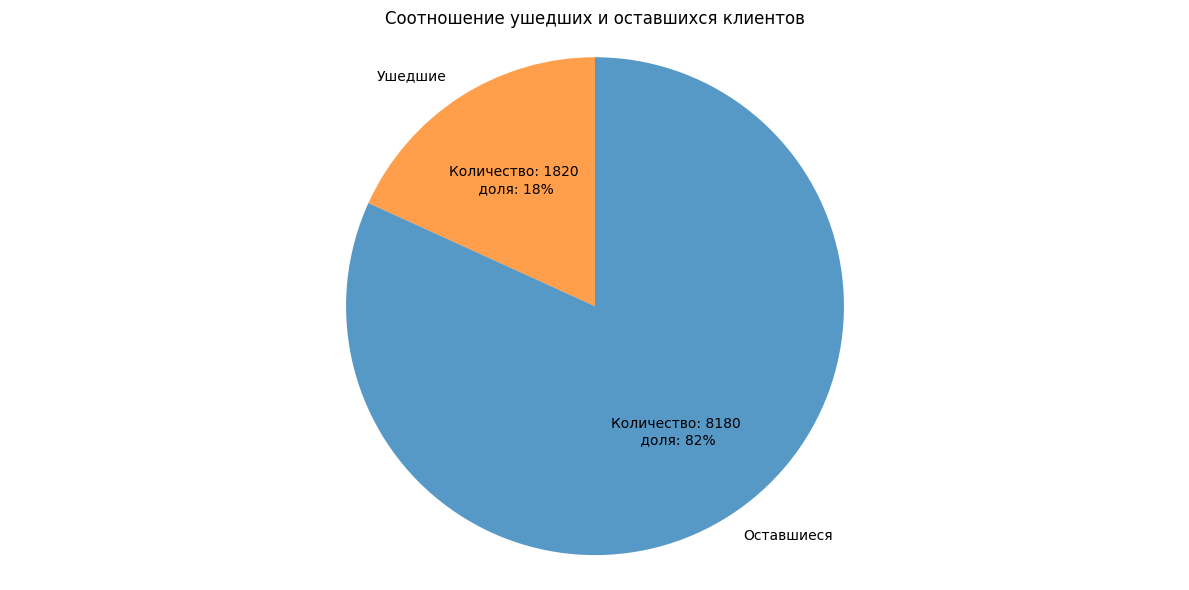

In [14]:
# группировка по признаку оттока
df_agg = df_bank.groupby('churn', as_index=False).size()

# функция для отображения подписей
def label_pct(pct, allusers):
    absolute = round(pct / 100 * allusers.sum())
    return f'Количество: {absolute}\n доля: {pct:.0f}%'
    
# вывод круговой диаграммы 
plt.figure(figsize=(12, 6))
plt.pie(
    df_agg['size'],
    autopct=lambda pct: label_pct(pct, df_agg['size']),
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_agg['churn']
    ],
    startangle=90,
    textprops={'fontsize': 10},
    counterclock=False,
    wedgeprops={'alpha': .75}
)
plt.title('Соотношение ушедших и оставшихся клиентов')
plt.axis('equal')
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Оставшихся клиентов:  **82%**
   
2. Ушедших клиентов:  **18%**

### Анализ баллов кредитного скоринга

Оценим распределение баллов кредитного скоринга в числовом виде.

In [15]:
df_bank['score'].describe()

count      10000.0
mean      848.6994
std      65.448519
min          642.0
25%          802.0
50%          853.0
75%          900.0
max         1000.0
Name: score, dtype: Float64

Оценим графически изменение вероятности ухода клиентов в зависимости от их баллов кредитного скоринга.

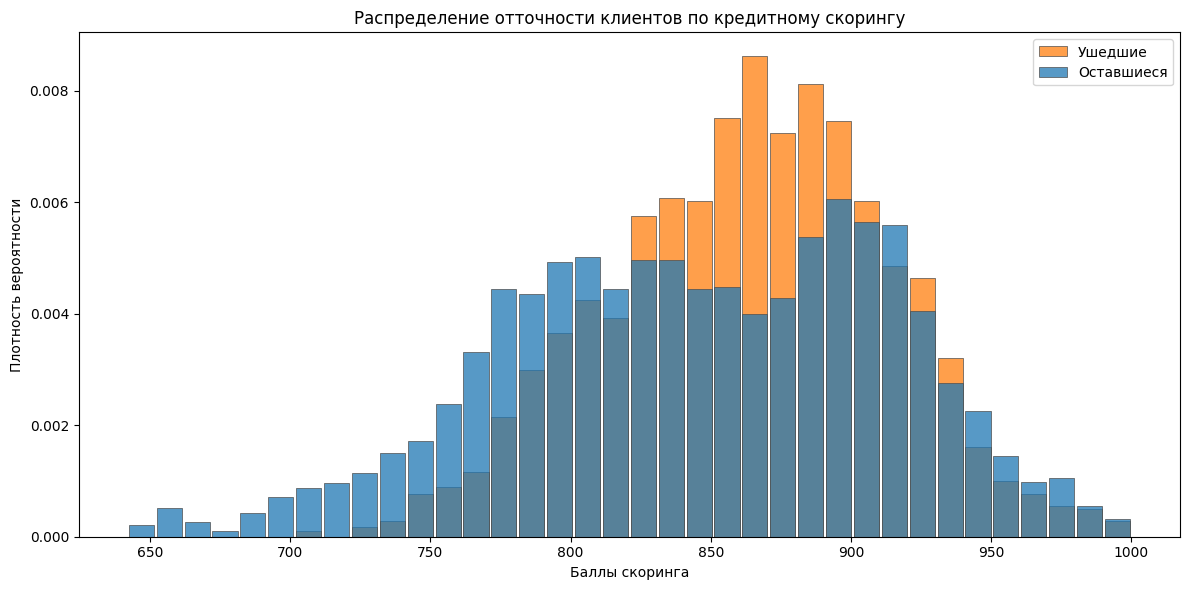

In [16]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика
sns.histplot(
    df_bank,
    x="score", 
    hue="churn",
    edgecolor=".3",
    binwidth=10,
    linewidth=.5,
    stat='density',
    common_norm=False,
    shrink=.9,
    alpha=.75
)
plt.legend(
    title='', 
    loc='upper right',
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_bank['churn'].unique()
    ]
)
plt.title('Распределение отточности клиентов по кредитному скорингу')
plt.ylabel('Плотность вероятности')
plt.xlabel('Баллы скоринга')
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы**
1. Баллы кредитного скоринга распределены в пределах от **642** до **1000**

2. Больше всего клиентов с кредитным скорингом около **900**

3. Потенциальный сегмент клиентов склонных к уходу: имеющие баллы кредитного скоринга от **830** до **900**

### Анализ количества продуктов в использовании

Оценим графически изменение вероятности ухода клиентов при увеличении количества используемых продуктов банка.

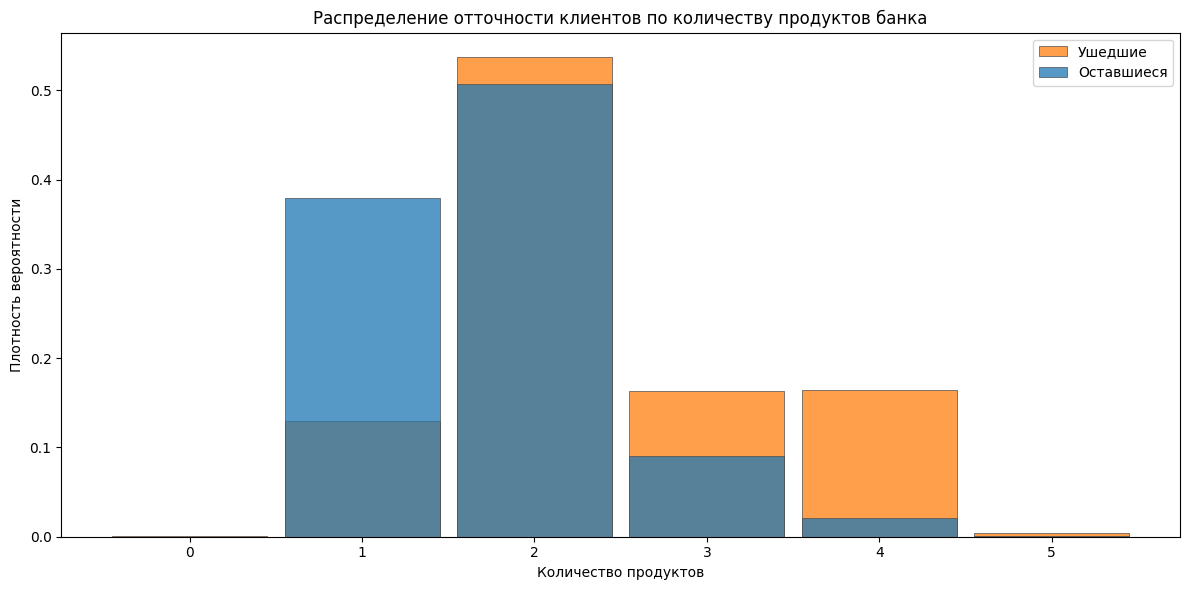

In [17]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика
sns.histplot(
    df_bank,
    x="products", 
    hue="churn",
    edgecolor=".3",
    linewidth=.5,
    binwidth=1,
    discrete=True,
    stat='density',
    common_norm=False,
    shrink=.9,
    alpha=.75
)
plt.legend(
    title='', 
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_bank['churn'].unique()
    ]
)
plt.title('Распределение отточности клиентов по количеству продуктов банка')
plt.ylabel('Плотность вероятности')
plt.xlabel('Количество продуктов')
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Чаще всего клиенты используют **1** или **2** продукта банка
   
3. С увеличением количества используемых продуктов увеличивается доля ушедших клиентов

4. Возможно ушедшие клиенты хотели получить дополнительные услуги, но их состав/качество оказалось неудовлетворительным

5. Потенциальный сегмент клиентов, склонных к уходу: использовавшие от **3-х** продуктов банка 

### Анализ клиентов по городам

Оценим числовое и графическое распределение клиентов по филиалам.

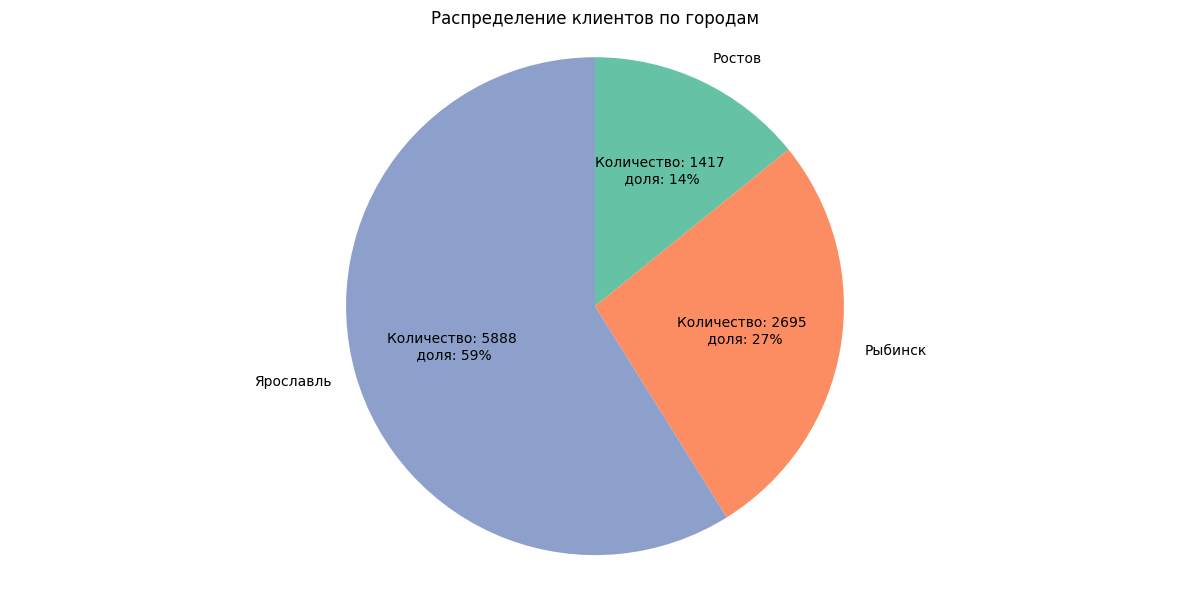

In [18]:
# группировка по городам
df_agg = df_bank.groupby('city', as_index=False).size()

# функция для отображения подписей
def label_pct(pct, allusers):
    absolute = round(pct / 100 * allusers.sum())
    return f'Количество: {absolute}\n доля: {pct:.0f}%'
    
# вывод круговой диаграммы
colors = sns.color_palette("Set2")
plt.figure(figsize=(12, 6))
plt.pie(
    df_agg['size'],
    autopct=lambda pct: label_pct(pct, df_agg['size']),
    labels=df_agg['city'],
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10},
    counterclock=False
)
plt.title('Распределение клиентов по городам')
plt.axis('equal')
plt.tight_layout()
plt.show()

Оценим графически изменение вероятности ухода клиентов в зависимости от филиала банка.

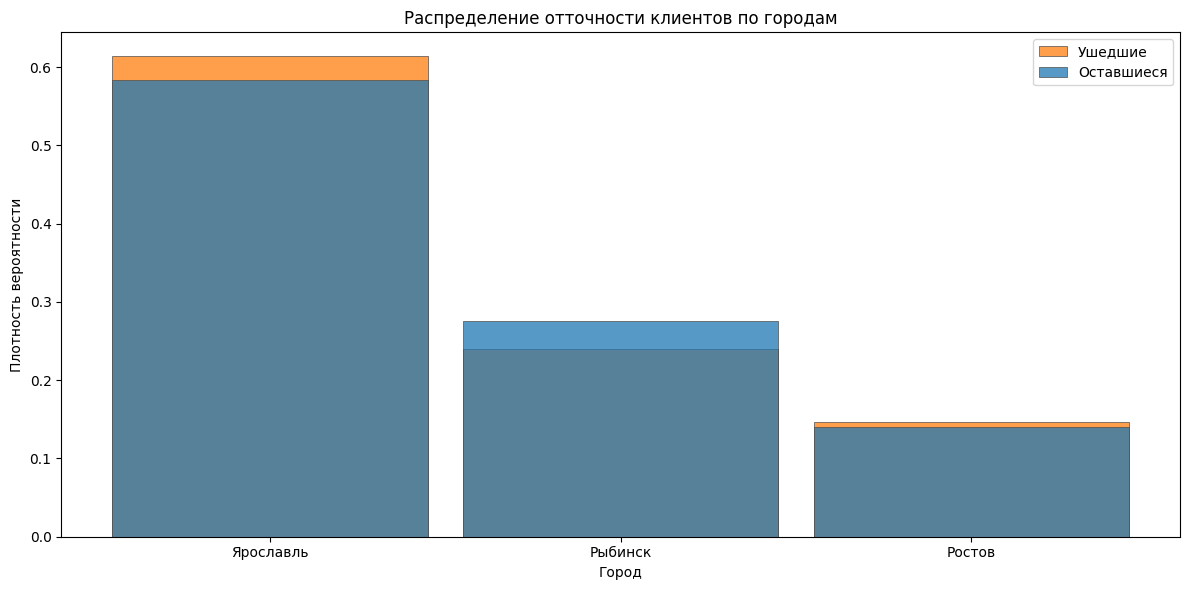

In [19]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика
ax = sns.histplot(
    df_bank,
    x=pd.Categorical(
        df_bank['city'], 
        categories=df_bank['city'].value_counts().index, 
        ordered=True
    ), 
    hue="churn",
    edgecolor=".3",
    linewidth=.5,
    discrete=True,
    stat='density',
    common_norm=False,
    shrink=.9,
    alpha=.75
)
plt.legend(
    title='', 
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_bank['churn'].unique()
    ]
)

plt.title('Распределение отточности клиентов по городам')
plt.ylabel('Плотность вероятности')
plt.xlabel('Город')
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Вывод:**

1. Больше всего клиентов из Ярославля **59%**, затем из Рыбинска **27%** и Ростова **14%**
   
2. Влияние города клиента на потенциальную возможность оказа от услуг банка незначительное.

### Анализ пола и возраста клиентов

Оценим графически распределение клиентов по полу и возрасту.

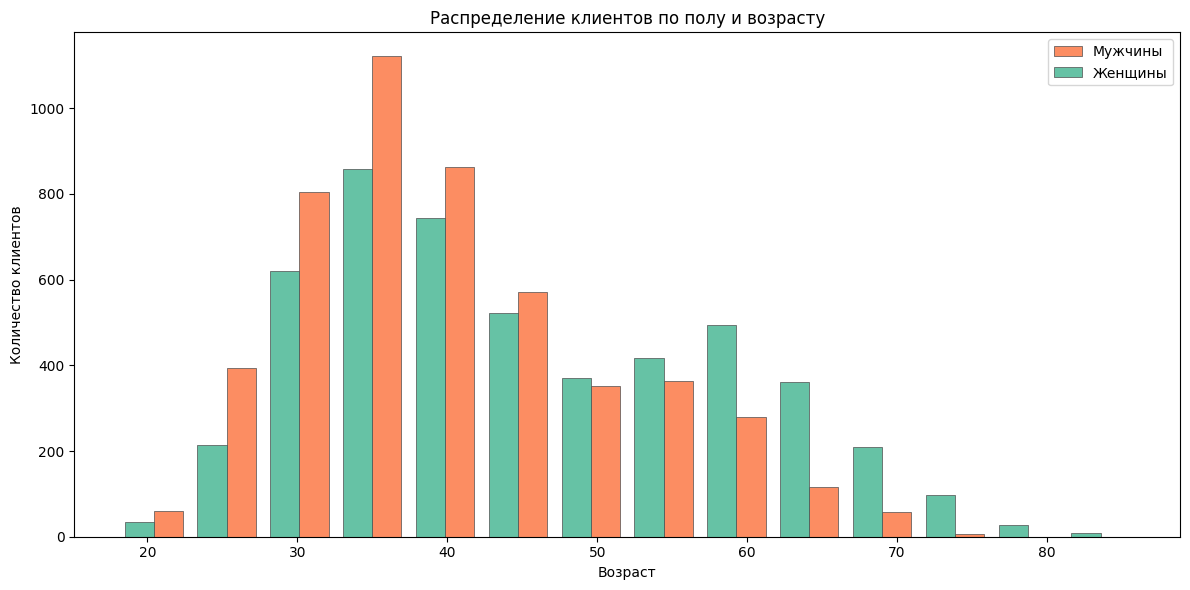

In [20]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика
palette = sns.color_palette("Set2",n_colors=2)
sns.histplot(
    df_bank,
    x="age", 
    hue="gender",
    multiple="dodge",
    edgecolor=".3",
    linewidth=.5,
    palette=palette,
    shrink=.8,
    alpha=1,
    binwidth=5,
)
plt.legend(
    title="", 
    loc='upper right',
    labels=['Мужчины', 'Женщины']
)
plt.title('Распределение клиентов по полу и возрасту')
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст')
plt.tight_layout()
plt.show()

Оценим графически изменение вероятности ухода клиента в зависимости от его пола.

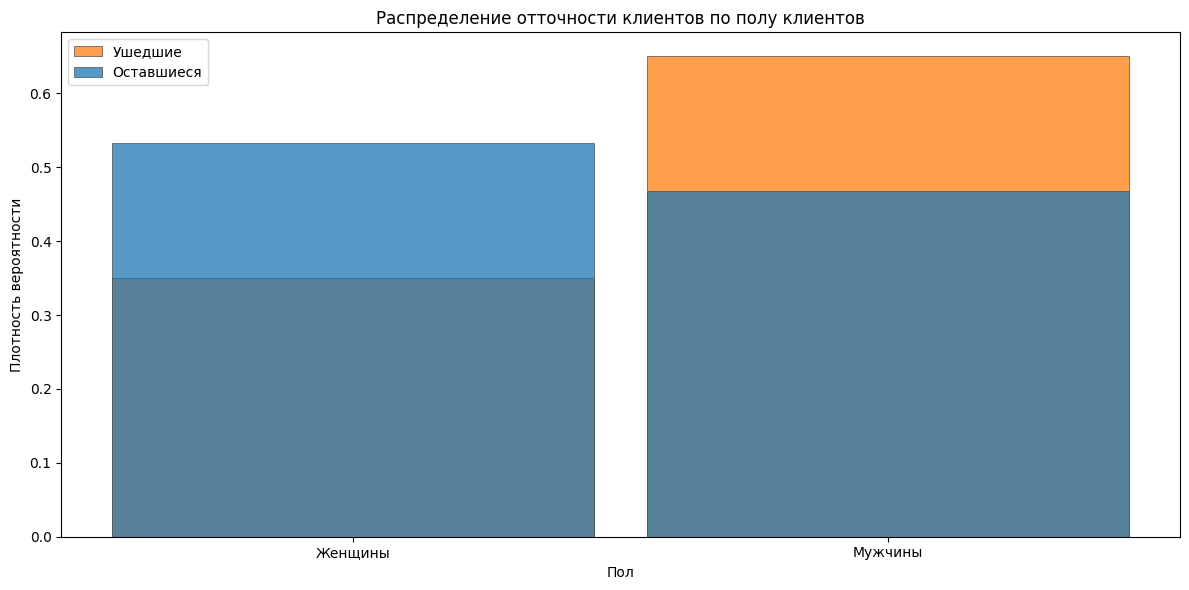

In [21]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика
sns.histplot(
    df_bank,
    x="gender", 
    hue="churn",
    edgecolor=".3",
    linewidth=.5,
    discrete=True,
    stat='density',
    common_norm=False,
    shrink=.9,
    alpha=.75
)
plt.legend(
    title='', 
    loc='upper left',
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_bank['churn'].unique()
    ]
)
plt.title('Распределение отточности клиентов по полу клиентов')
plt.ylabel('Плотность вероятности')
plt.xlabel('Пол')
plt.xticks(ticks=[0, 1], labels=['Женщины', 'Мужчины'])
plt.tight_layout()
plt.show()

Оценим графически изменение вероятности ухода клиента в зависимости от его возраста.

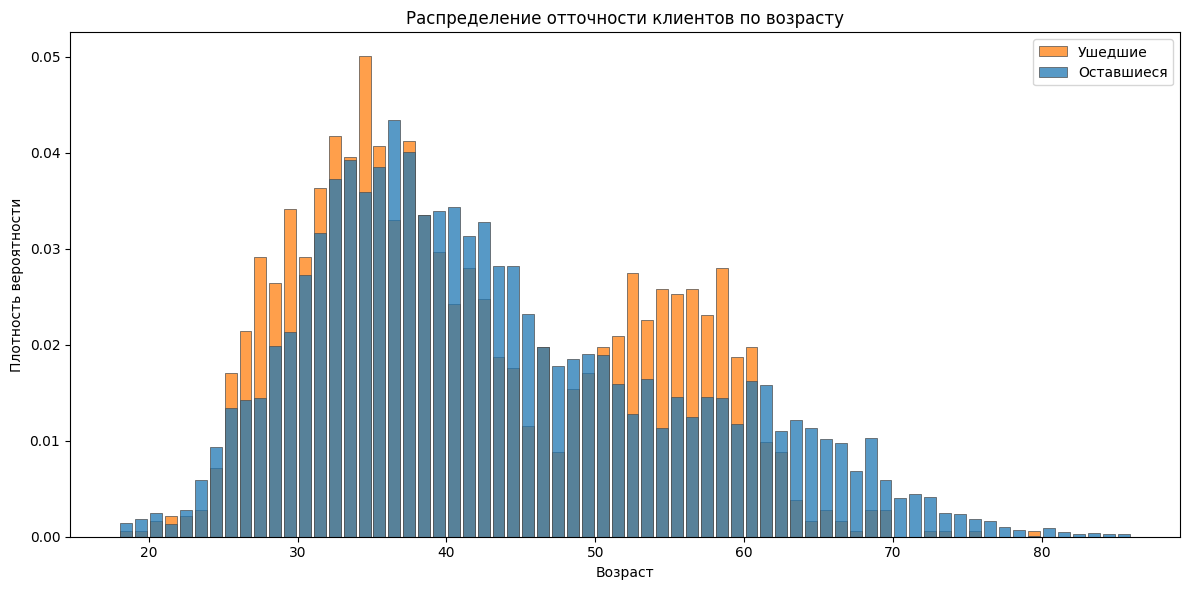

In [22]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика - 1 столбик = 1 год
sns.histplot(
    df_bank,
    x="age", 
    hue="churn",
    edgecolor=".3",
    linewidth=.5,
    binwidth=1,
    stat='density',
    common_norm=False,
    shrink=.8,
    alpha=.75
)
plt.legend(
    title='', 
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_bank['churn'].unique()
    ]
)
plt.title('Распределение отточности клиентов по возрасту')
plt.ylabel('Плотность вероятности')
plt.xlabel('Возраст')
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Вывод**
1. До **50** лет больше клиентов - мужчин, а старше 50 лет больше клиентов - женщин

2. Потенциально мужчины более склонны к отказу от услуг банка
   
3. Потенциальные возрастные сегменты клиентов, склонных к уходу:

   - **26 - 30** лет
   - **32, 33, 35** лет
   - **52 - 61** лет

### Анализ количества баллов собственности

Оценим графически изменение вероятности ухода клиента в зависимости от наличия собственности.

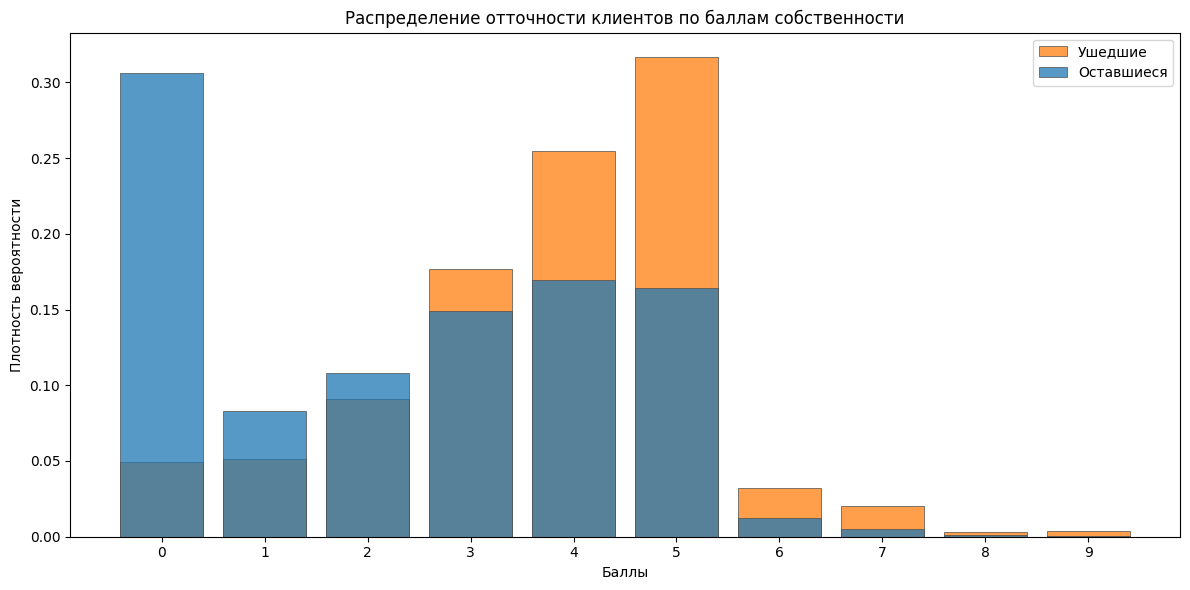

In [23]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика - 1 столбик = 1 год
sns.histplot(
    df_bank,
    x="equity", 
    hue="churn",
    edgecolor=".3",
    linewidth=.5,
    stat='density',
    discrete=True,
    common_norm=False,
    shrink=.8,
    alpha=.75
)
plt.legend(
    title='', 
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_bank['churn'].unique()
    ]
)
plt.title('Распределение отточности клиентов по баллам собственности')
plt.ylabel('Плотность вероятности')
plt.xlabel('Баллы')
plt.xticks(df_bank['equity'].unique())
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Больше всего у клиентов **0** или **5** баллов, оценивающих наличие собственности
   
2. Потенциальный сегмент клиентов, склонных к уходу: от **4-х** баллов собственности      

### Анализ баланса на счете
Оценим графически распределение баланса на счете у клиентов.

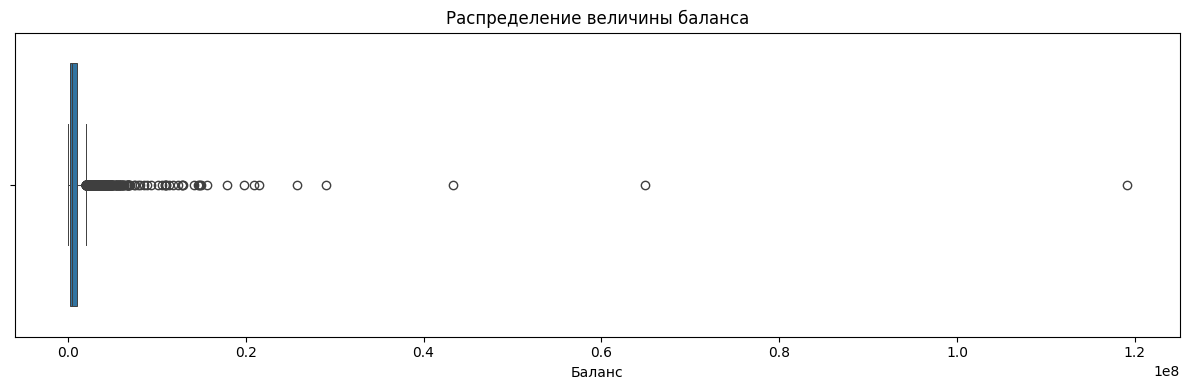

In [24]:
# вывод графика распределения среднего чека
plt.figure(figsize=(12, 4))
sns.boxplot(
data=df_bank,
x='balance',
linewidth=.7
)
plt.title('Распределение величины баланса')
plt.ylabel('')
plt.xlabel('Баланс')
plt.tight_layout()
plt.show()

Оценим графически изменение вероятности ухода клиента в зависимости от баланса на счете. Для более точной оценки исключим отображение выбросов на графике.

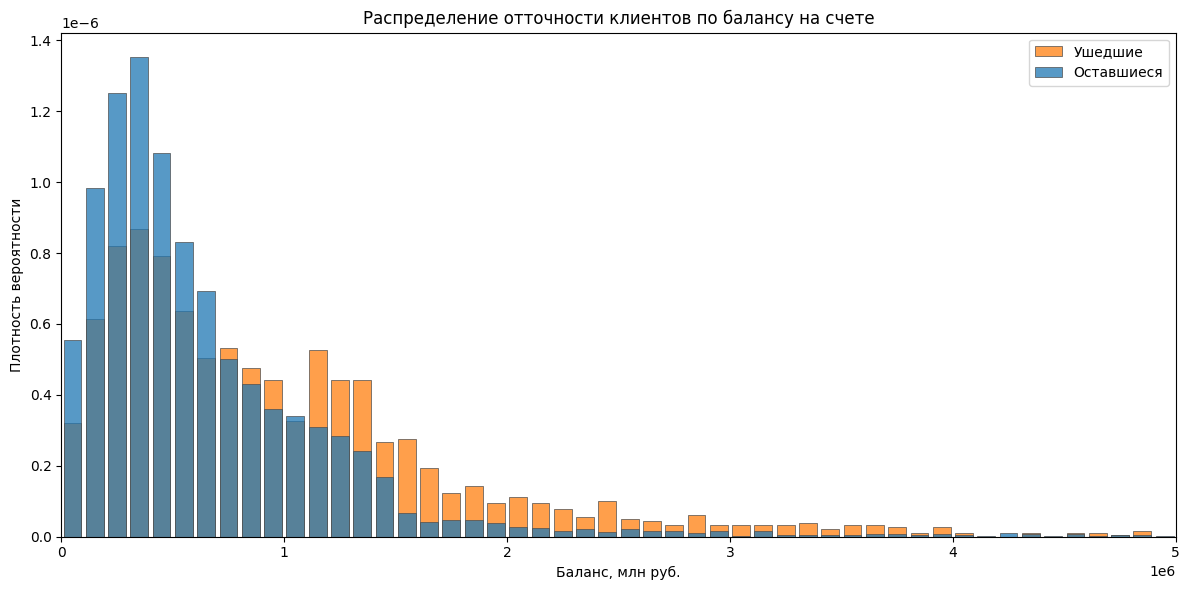

In [25]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика
sns.histplot(
    df_bank,
    x="balance", 
    hue="churn",
    edgecolor=".3",
    linewidth=.5,
    binwidth=100000,
    stat='density',
    common_norm=False,
    shrink=.8,
    alpha=.75
)
plt.legend(
    title='', 
    loc='upper right',
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_bank['churn'].unique()
    ]
)
plt.title('Распределение отточности клиентов по балансу на счете')
plt.ylabel('Плотность вероятности')
plt.xlabel('Баланс, млн руб.')
plt.xlim(0,5000000)
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Чаще всего у клиентов на счете **300-500** тыс. руб.

2. Потенциальный сегмент клиентов, склонных к уходу: от **1,2** до **4** млн руб. на счете

### Анализ наличия кредитной карты

Оценим графически изменение вероятности ухода клиента в зависимости от наличия кредитной карты.

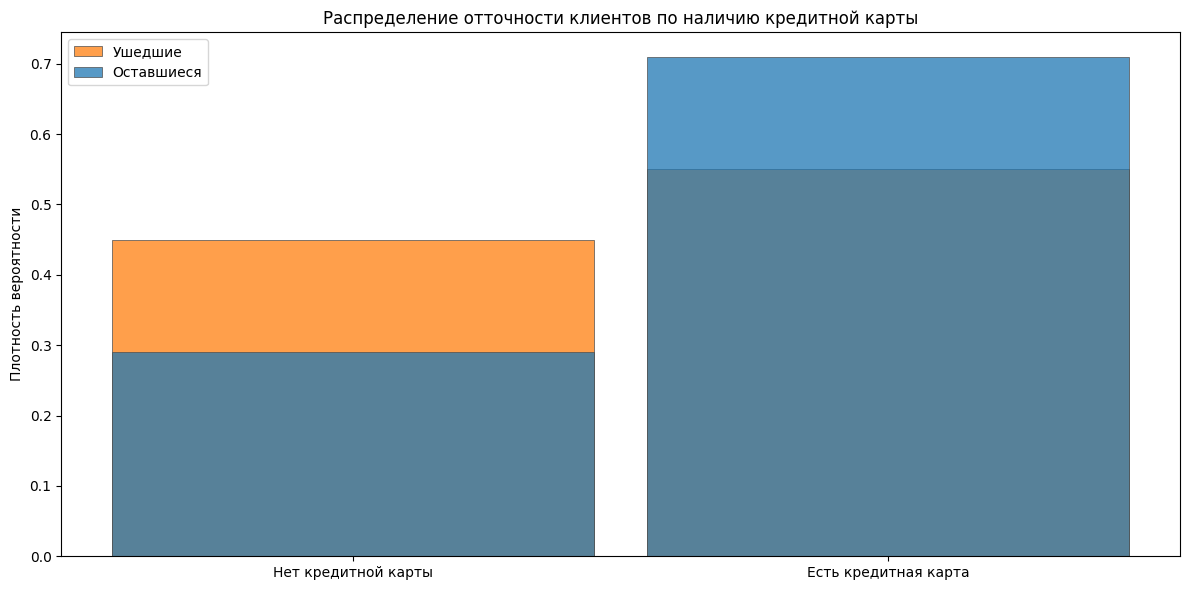

In [26]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика
sns.histplot(
    df_bank,
    x='credit_card', 
    hue='churn',
    edgecolor=".3",
    linewidth=.5,
    discrete=True,
    stat='density',
    common_norm=False,
    shrink=.9,
    alpha=.75
)
plt.legend(
    title='', 
    loc='upper left',
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_bank['churn'].unique()
    ]
)
plt.title('Распределение отточности клиентов по наличию кредитной карты')
plt.ylabel('Плотность вероятности')
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Нет кредитной карты', 'Есть кредитная карта'])
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Вывод:**

1. Клиентов с кредитной картой больше

2. Потенциальный сегмент клиентов, склонных к уходу: **без наличия кредитной карты**
   

### Анализ активности клиентов

Оценим графически изменение вероятности ухода клиента в зависимости от активности клиентов.

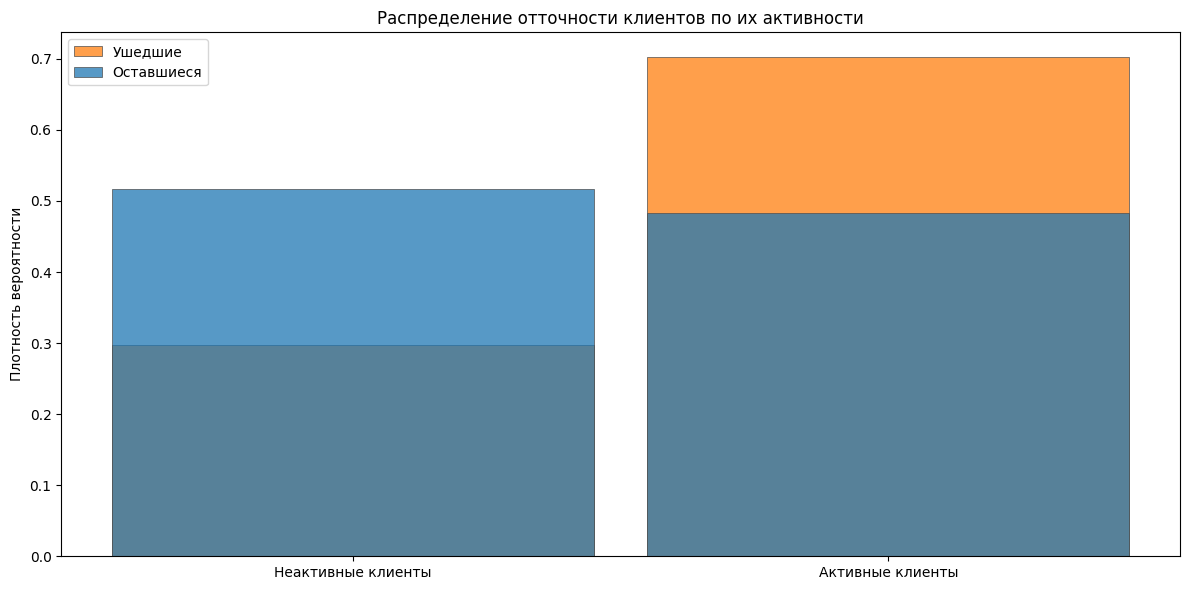

In [27]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика
sns.histplot(
    df_bank,
    x='last_activity', 
    hue="churn",
    edgecolor=".3",
    linewidth=.5,
    discrete=True,
    stat='density',
    common_norm=False,
    shrink=.9,
    alpha=.75
)
plt.legend(
    title='', 
    loc='upper left',
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_bank['churn'].unique()
    ]
)
plt.title('Распределение отточности клиентов по их активности')
plt.ylabel('Плотность вероятности')
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Неактивные клиенты', 'Активные клиенты'])
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Больше активных клиентов
   
2. Потенциальный сегмент клиентов, склонных к уходу: **активные клиенты**

### Анализ оценочного дохода

Оценим графически распределение дохода клиентов.

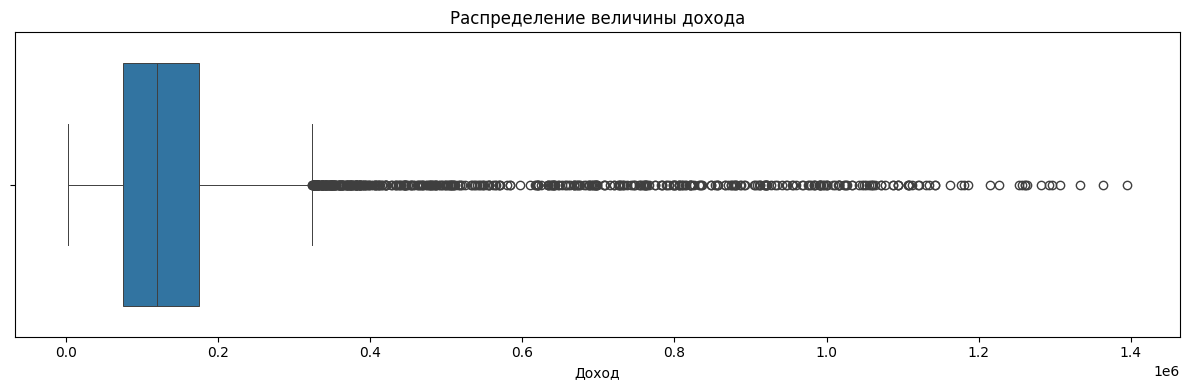

In [28]:
# вывод графика распределения среднего чека
plt.figure(figsize=(12, 4))
sns.boxplot(
data=df_bank,
x='est_salary',
linewidth=.7
)
plt.title('Распределение величины дохода')
plt.ylabel('')
plt.xlabel('Доход')
plt.tight_layout()
plt.show()

Оценим графически изменение вероятности ухода клиента в зависимости от величины оценочного дохода клиентов. Для более точной оценки исключим отображение выбросов на графике.

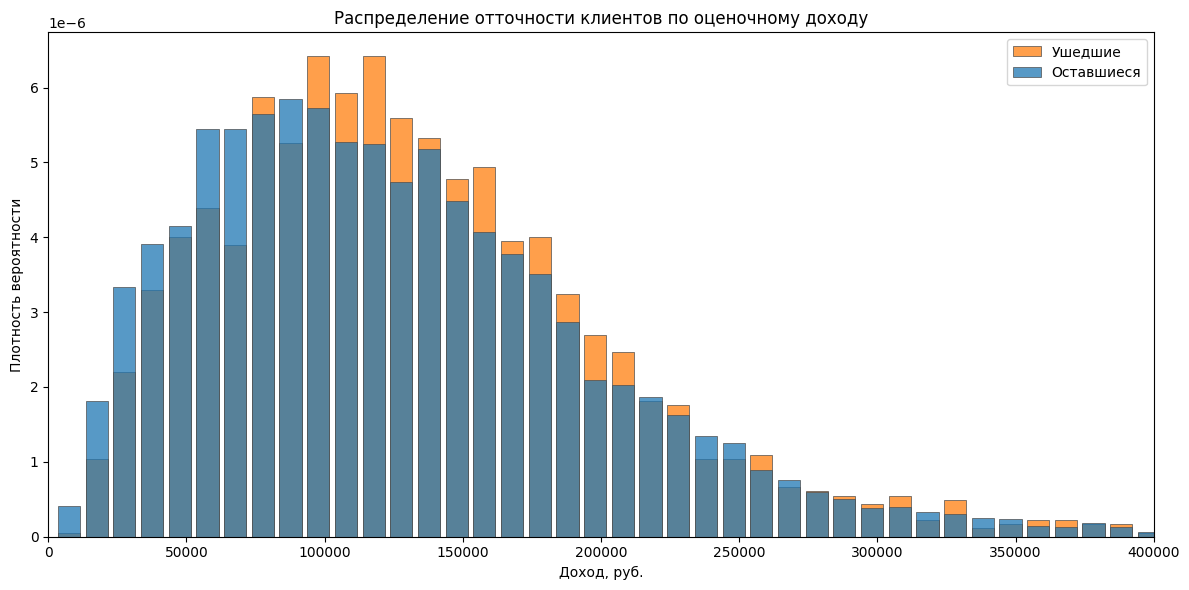

In [29]:
# задание размера графика 
plt.figure(figsize=(12, 6))

# вывод графика
sns.histplot(
    df_bank,
    x="est_salary", 
    hue="churn",
    edgecolor=".3",
    linewidth=.5,
    binwidth=10000,
    stat='density',
    common_norm=False,
    shrink=.8,
    alpha=.75
)
plt.legend(
    title='', 
    loc='upper right',
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in df_bank['churn'].unique()
    ]
)
plt.title('Распределение отточности клиентов по оценочному доходу')
plt.ylabel('Плотность вероятности')
plt.xlabel('Доход, руб.')
plt.xlim(0,400000)
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Чаще всего доход клиентов оценивается в **100** тыс. руб.
   
2. Потенциальный сегмент клиентов, склонных к уходу: с доходом от **100** до **210** тыс. руб.

### Матрица корреляции между характеристками клиентов

Оценим взаимосвязь характеристик с попомощью коэффициента корреляции `phi_k`, адаптированного к учету категориальных, порядковых и интервальных переменных. Корреляцию характеристик покажем на тепловой карте.

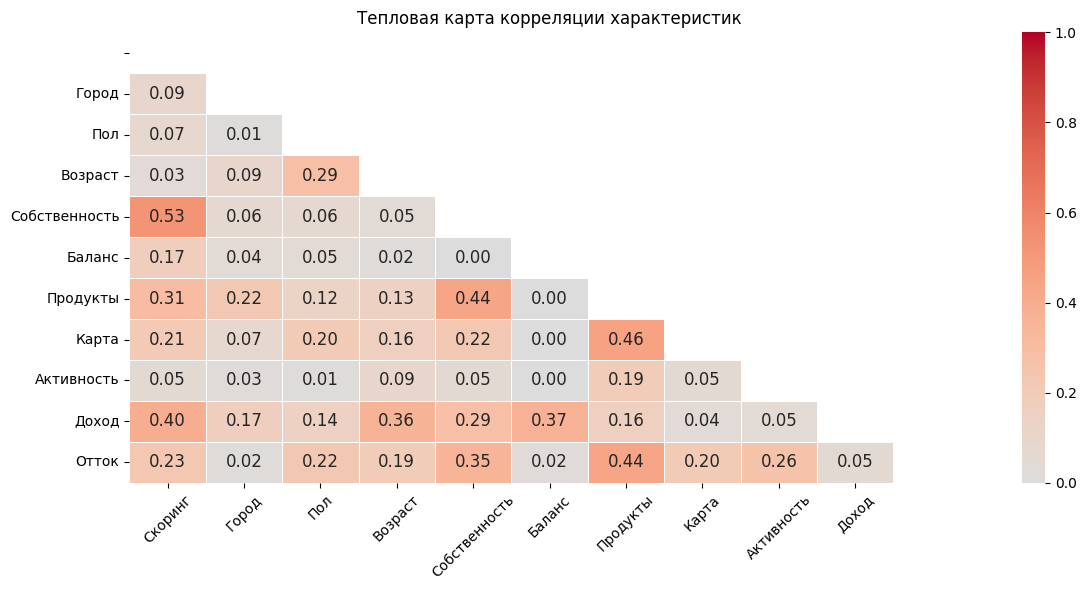

In [30]:
# подготовка датафрейма
df_phik = df_bank.drop(columns=['userid'])

# указание столбцов с интервальными переменными
interval_cols = ['score', 'age', 'balance', 'est_salary']

# формирование матрицы корреляции
phik_corr = df_phik.phik_matrix(interval_cols=interval_cols)

# задание размера графика 
plt.figure(figsize=(12, 6))

# скрытие верхнего трегольника
mask = np.triu(np.ones_like(phik_corr, dtype=bool))

# вывод графика
ax = sns.heatmap(
    data=phik_corr,
    vmax=1,
    annot=True,
    mask=mask,
    cmap='coolwarm',
    center=0,
    linewidths=.5,
    fmt=".2f",
    annot_kws={'size':12},
    xticklabels=[
        'Скоринг', 
        'Город', 
        'Пол', 
        'Возраст', 
        'Собственность', 
        'Баланс', 
        'Продукты', 
        'Карта', 
        'Активность', 
        'Доход'],
    yticklabels=[
        '', 
        'Город', 
        'Пол', 
        'Возраст', 
        'Собственность', 
        'Баланс', 
        'Продукты', 
        'Карта', 
        'Активность', 
        'Доход',
        'Отток'],
)
plt.title('Тепловая карта корреляции характеристик')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы по умеренной положительной корреляции между характеристиками:**

1. Отток клиентов связан с количеством используемых банковских продуктов и наличием собственности
   
2. Кредитный скоринг клиента связан с наличием собственности и оценочным уровень дохода

3. Количество используемых продуктов связано с наличием собственности и кредитной карты

4. Уровень баланса связан с доходом клиента, который связан с возрастом

<a id="analyze_segment"></a>
## Анализ сегментов с высокой отточностью

Критерий: от 500 клиентов, доля ушедших от 30%.

Создадим функцию для расчета высокоотточных сегментов.

In [31]:
# создание функции для расчета сегментов
def segment_churn(unique_values, interval_value):
    results = []
    
    # Перебор характеристик
    for feature1 in unique_values.keys():
        for feature2 in unique_values.keys():
            if feature1 != feature2:
                
                if feature1 in interval_value:
                    query_feature1 = (
                        f"({unique_values[feature1][0]} <= {feature1} "
                        f"<= {unique_values[feature1][1]})"
                    )
                else:
                    query_feature1 = f"({feature1} == {repr(unique_values[feature1])})"
                
                if feature2 in interval_value:
                    query_feature2 = (
                        f"({unique_values[feature2][0]} <= {feature2} "
                        f"<= {unique_values[feature2][1]})"
                    )
                else:
                    query_feature2 = f"({feature2} == {repr(unique_values[feature2])})"
                
                query_string = f"{query_feature1} & {query_feature2}" 
                query_string = query_string.replace("age1", "age").replace("age2", "age")
                
                filtered_df = df_bank.query(query_string)
                total_clients = len(filtered_df)
                churn_clients = filtered_df['churn'].sum()
                churn_rate = filtered_df['churn'].mean() if total_clients > 0 else None
                
                results.append({
                    'feature1': f"{feature1} {unique_values[feature1]}",
                    'feature2': f"{feature2} {unique_values[feature2]}",
                    'total_clients': total_clients,
                    'churn_clients': churn_clients,
                    'churn_rate': churn_rate
                })
    
    # формирование датафрейма сегментов
    results_df = pd.DataFrame(results)
    results_df = \
    (
        results_df
        .drop_duplicates(subset=['total_clients', 'churn_rate'])
        .query('(500 <= total_clients) & (churn_rate >= 0.3)')
        .sort_values(by='churn_rate', ascending=False)
    )
    results_df['churn_rate'] = round(results_df['churn_rate'], 2)
    pd.set_option('display.max_colwidth', 30)
    
    # вывод Топ-10 сегментов по количеству ушедших клиентов
    message = (
        f"\n\n**Топ-10 сегментов по доле ушедших клиентов**"
    )
    if flag_md == 1:
        display(Markdown(message))
    else:
        print(message.replace("*", ""))
    display(results_df.head(10))

Создадим словарь отточных интервалов характеристик, выявленных в результате исследовательского анализа. И сформируем таблицу отточных сегментов, отсортированную по убыванию количества ушедших клиентов.

In [32]:
# создание словаря интервалов характеристик с повышенным оттоком
unique_values = {
    'score': (830, 900),
    'products': (3,5),
    'age1': (26, 35),
    'age2': (52, 61),
    'equity': (4, 9),
    'balance': (1200000, 4000000),
    'est_salary': (100000, 210000),
    'credit_card': False,
    'last_activity': True,
    'gender': "М"    
}
interval_value = ['score', 'products', 'age', 'age', 'equity', 'balance', 'est_salary']

# формирование высокоотточных сегментов
segment_churn(unique_values, interval_value)



**Топ-10 сегментов по доле ушедших клиентов**

,feature1,feature2,total_clients,churn_clients,churn_rate
52,"balance (1200000, 4000000)",last_activity True,642,367,0.57
53,"balance (1200000, 4000000)",gender М,657,350,0.53
17,"products (3, 5)",gender М,752,376,0.50
51,"balance (1200000, 4000000)",credit_card False,627,303,0.48
50,"balance (1200000, 4000000)","est_salary (100000, 210000)",674,323,0.48
16,"products (3, 5)",last_activity True,824,391,0.47
14,"products (3, 5)","est_salary (100000, 210000)",659,304,0.46
12,"products (3, 5)","equity (4, 9)",953,426,0.45
40,"equity (4, 9)","balance (1200000, 4000000)",945,416,0.44
0,"score (830, 900)","products (3, 5)",629,267,0.42


<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Топ-3 выскоотточных сегментов:
   - Активные клиенты с балансом на счете от **1,2** до **4** млн руб.
   - Мужчины с балансом на счете от **1,2** до **4** млн руб.
   - Мужчины, использующие от **3** до **5** продуктов банка
     
2. Портрет типичного клиента, склонного к уходу из банка:
   - С балансом на счете от **1,2** до **4** млн руб.
   - Активно пользуется услугами банка
   - Чаще мужчина, чем женщина
   - Использующий от **3** до **5** продуктов банка
   - Не имеет кредитной карты
   - С доходом от **100 до 200** тыс руб.

3. Рекомендации по удержанию клиентов из высокоотточных сегментов:
   - регулярно собирать отзывы клиентов для адаптации предложений и продуктов банка
   - специальная ставка по депозитам - например, повышенный процент при открытии депозита на крупную сумму
   - предлагать премиальные банковские карты с бонусными программами, кэшбэком за покупки в определенных категориях
   - разработать специальные кредитные продукты для клиентов с высоким кредитным скорингом и не имеющих кредитной карты
   - возможность быстро получить консультацию специалиста банка, не посещая отделение
   - разработать маркетинговые кампании, ориентированные на их интересы, например, в области инвестиций или кредитования

<a id="hypothesis"></a>
## Проверка статистических гипотез

### Гипотеза о различии дохода между ушедшими и оставшимися клиентами

Сформулируем гипотезы:

**H0** - нулевая гипотеза:
- различий в доходе между ушедшими и оставшимися клиентами нет

**H1** - альтернативная двусторонняя гипотеза
- различия в доходе между ушедшими и оставшимися клиентами есть

Поскольку в величине дохода есть выбросы - проверим гипотезу с помощью двустороннего теста «U-критерия Манна-Уитни» для независимых выборок. Если вероятность ошибочно отвергнуть нулевую гипотезу `p-value` окажется меньше уровня статистической значимости `alpha = 5%`, то отвергнем нулевую гипотезу в пользу альтернативной.

Оценим графически распределение среднего дохода клиентов, например по количеству баллов собственности.

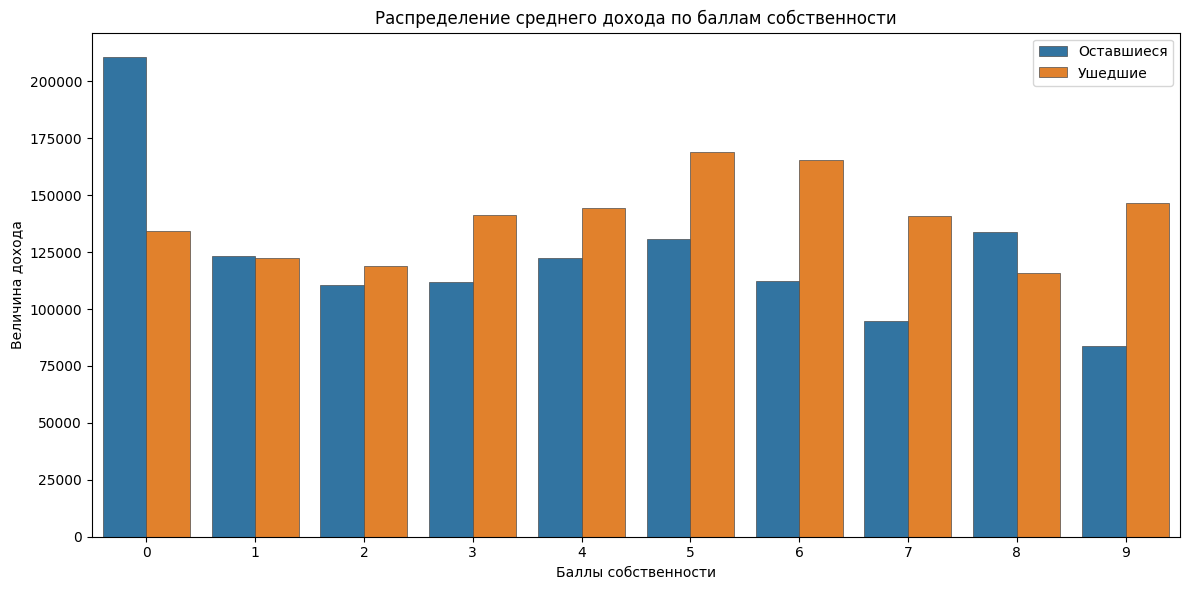

In [33]:
# задание размера графика
plt.figure(figsize=(12, 6))

# вывод графика
sns.barplot(
    data=df_bank,
    x="equity",
    y="est_salary",
    edgecolor=".3",
    linewidth=.5,
    hue='churn',
    errorbar=None
)
plt.legend(
    title='', 
    loc='upper right',
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in sorted(df_bank['churn'].unique())
    ]
)
plt.title('Распределение среднего дохода по баллам собственности')
plt.ylabel('Величина дохода')
plt.xlabel('Баллы собственности')
plt.tight_layout()
plt.show()

Визуальная оценка - средние доходы ушедших и оставшихся различаются. Проверим статистическую значимость различия.

In [34]:
# датафрейм ушедших клиентов
df_true = df_bank.query('churn == True')

# датафрейм оставшихся клиентов
df_false = df_bank.query('churn == False')

# задание уровня статистической значимости
alpha = 0.05

# выполнение u-теста с двусторонней альтернативной гипотезой
p_value = st.mannwhitneyu(
    df_true['est_salary'],
    df_false['est_salary'],
    alternative='two-sided'
)[1]

# проверка гипотезы
if p_value < alpha:
    message = (
        f'p_value=**{p_value:.2e}** < {alpha:.2%}\n\n'
        f' Отвергаем нулевую гипотезу: \
        есть статистически значимые различия в доходе между ушедшими и оставшимися клиентами.'
    )
else:
    message = (
        f'p_value=**{p_value:.2%}** >= {alpha:.2%}\n\n'
        f' Не удалось отвергнуть нулевую гипотезу:\
        нет статистически значимых различий в доходе между ушедшими и оставшимися клиентами.'
    )

if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))

p_value=**2.44e-04** < 5.00%

 Отвергаем нулевую гипотезу:         есть статистически значимые различия в доходе между ушедшими и оставшимися клиентами.

<div style="border:solid gray 1px; padding: 20px">

**Вывод:**

1. Различия в доходе между ушедшими и оставшимися клиентами являются статистически значимыми 

### Гипотеза о разном возрасте ушедших и оставшихся клиентов

Сформулируем гипотезы:

**H0** - нулевая гипотеза:
- различий в возрасте между ушедшими и оставшимися клиентами нет

**H1** - альтернативная двусторонняя гипотеза
- различия в возрасте между ушедшими и оставшимися клиентами есть

Поскольку распределение возраста близко к нормальному и нет выбросов - проверим гипотезу с помощью Т-критерия Стьюдента для независимых выборок. Если вероятность ошибочно отвергнуть нулевую гипотезу `p-value` окажется меньше уровня статистической значимости `alpha = 5%`, то отвергнем нулевую гипотезу в пользу альтернативной.

Оценим графически распределение среднего возраста клиентов, например по количеству баллов собственности.

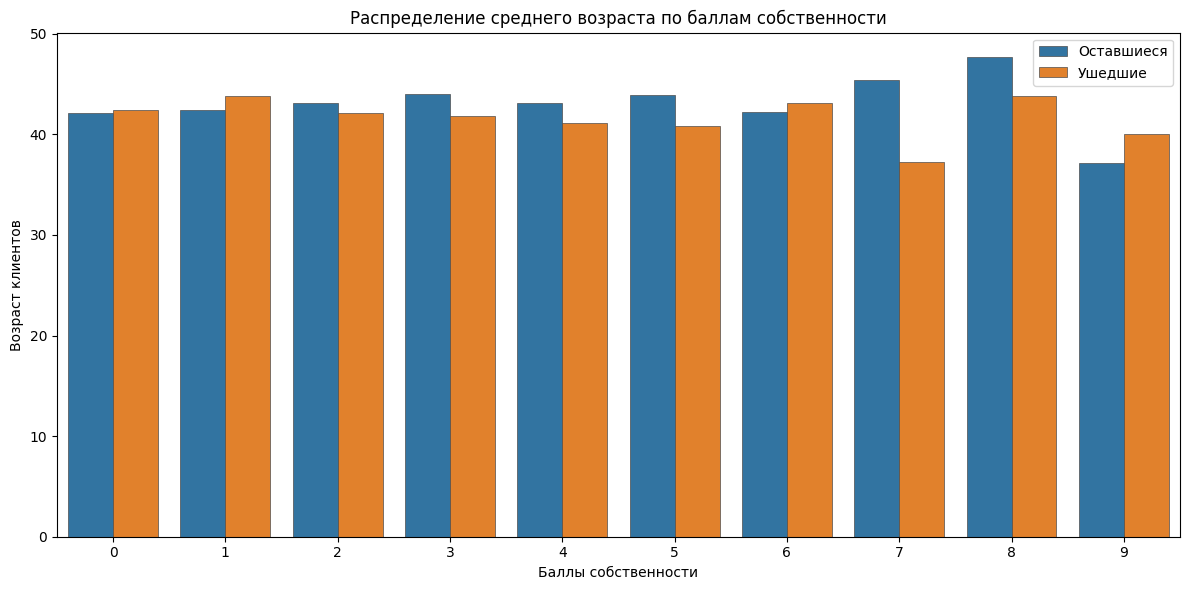

In [35]:
# задание размера графика
plt.figure(figsize=(12, 6))

# вывод графика
sns.barplot(
    data=df_bank,
    x="equity",
    y="age",
    edgecolor=".3",
    linewidth=.5,
    hue='churn',
    errorbar=None
)
plt.legend(
    title='', 
    loc='upper right',
    labels=[
        f'{"Ушедшие" if group == True else "Оставшиеся"}' 
        for group in sorted(df_bank['churn'].unique())
    ]
)
plt.title('Распределение среднего возраста по баллам собственности')
plt.ylabel('Возраст клиентов')
plt.xlabel('Баллы собственности')
plt.tight_layout()
plt.show()

Визуальная оценка - средний возраст ушедших и оставшихся различается. Проверим статистическую значимость различия.

In [36]:
# датафрейм ушедших клиентов
df_true = df_bank.query('churn == True').dropna(subset=['age'])

# датафрейм оставшихся клиентов
df_false = df_bank.query('churn == False').dropna(subset=['age'])

# задание уровня статистической значимости
alpha = 0.05

# выполнение t-теста с двусторонней альтернативной гипотезой
p_value = st.ttest_ind(
    df_true['age'],
    df_false['age'],
    alternative='two-sided'
)[1]

# проверка гипотезы
if p_value < alpha:
    message = (
        f'p_value=**{p_value:.2e}** < {alpha:.2%}\n\n'
        f' Отвергаем нулевую гипотезу: \
        есть статистически значимые различия в возрасте между ушедшими и оставшимися клиентами.'
    )
else:
    message = (
        f'p_value=**{p_value:.2%}** >= {alpha:.2%}\n\n'
        f' Не удалось отвергнуть нулевую гипотезу:\
        нет статистически значимых различий в возрасте между ушедшими и оставшимися клиентами.'
    )

if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))

p_value=**6.50e-07** < 5.00%

 Отвергаем нулевую гипотезу:         есть статистически значимые различия в возрасте между ушедшими и оставшимися клиентами.

<div style="border:solid gray 1px; padding: 20px">

**Вывод:**

1. Различия в возрасте между ушедшими и оставшимися клиентами являются статистически значимыми 

<a id="research_results"></a>
## Итоги исследования

Результаты исследования помогут менеджменту банка «Метанпром» сократить отток клиентов.


[Презентация результатов исследования](https://disk.yandex.ru/i/4N8lRLVmxNufjw)


1. В среднем по банку -  **18%** клиентов склонны к уходу из банка

2. Портрет типичного клиента, склонного к отказу от услуг банка:

   - Наличие собственности - от **4** баллов
   - Активно пользуется услугами банка
   - Чаще мужчина, чем женщина
   - С высоким кредитным рейтингом от **830**
   - Не имеет кредитной карты
   - С доходом от **100** до **200** тыс руб.

4. Топ-3 выскоотточных сегментов:

   - Активные клиенты с баллами собственности от **4**
   - Мужчины с баллами собственности от **4**
   - Активные клиенты с кредитным скорингом от **830**
    
6. Дополнительные потенциальные сегменты клиентов, склонных к уходу:

   - использовавшие от **3-х** продуктов банка
   - в возрасте: **26 - 35** лет и **52 - 61** лет
   - с балансом на счете от **1,2** до **4** млн руб.

8. Существует умеренная положительная корреляция между характеристиками:

   - отток клиентов связан с количеством используемых банковских продуктов и наличием собственности
   - кредитный скоринг клиента связан с наличием собственности и оценочным уровень дохода
   - количество используемых продуктов связано с наличием собственности и кредитной карты
   - уровень баланса связан с доходом клиента, который связан с возрастом

7. Обнаружены статистически значимые различия:

   - в доходе между ушедшими и оставшимися клиентами
   - в возрасте между ушедшими и оставшимися клиентами

**Рекомендации по удержанию клиентов:**

1. Регулярно собирать отзывы клиентов для адаптации предложений и продуктов банка
2. Специальная ставка по депозитам - например, повышенный процент при открытии депозита на крупную сумму
3. Предлагать премиальные банковские карты с бонусными программами, кэшбэком за покупки в определенных категориях
4. Разработать специальные кредитные продукты для клиентов с высоким кредитным скорингом и не имеющих кредитной карты
5. Возможность быстро получить консультацию специалиста банка, не посещая отделение
6. Разработать маркетинговые кампании, ориентированные на их интересы, например, в области инвестиций или кредитования

[Вернуться в начало](#intro)